In [3]:
import sys

sys.path.insert(0, 'Lux\model')

In [4]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import conf
from conf import RESULT_DIR
from scipy.stats import kstest, norm, kurtosis
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
plt.style.use('ggplot')

In [5]:
df_list = pd.read_csv("{RESULT_DIR}\model_vars.csv",
usecols=['price','run'])

In [8]:
avgavgcov = []
for run in range(conf.N_RUNS):
    runprice = df_list[df_list['run'] == run]['price']
    tau = 20 
    runreturns = 100*runprice.pct_change()
    avgcov = [np.average(abs(runreturns).rolling(i).cov()[i:]) for i in range(3,6000)]
    avgavgcov.append(np.average(avgcov))

C:\Users\marco\AppData\Local\Temp\ipykernel_9164\2328546489.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  avgcov = [np.average(abs(runreturns).rolling(i).cov()[i:]) for i in range(3,6000)]


In [13]:
df = pd.DataFrame(avgavgcov)
df.to_csv("avgcovperrun.csv")

(array([ 1.,  1.,  0.,  1.,  1.,  0.,  3.,  1.,  4.,  4.,  5.,  4.,  6.,
         9.,  9.,  9., 20., 14., 26., 26., 20., 27., 23., 33., 29., 20.,
        38., 20., 29., 24., 17., 14., 10., 12.,  5., 13.,  6.,  4.,  4.,
         2.,  1.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0013493 , 0.00135262, 0.00135595, 0.00135927, 0.00136259,
        0.00136592, 0.00136924, 0.00137257, 0.00137589, 0.00137921,
        0.00138254, 0.00138586, 0.00138918, 0.00139251, 0.00139583,
        0.00139915, 0.00140248, 0.0014058 , 0.00140913, 0.00141245,
        0.00141577, 0.0014191 , 0.00142242, 0.00142574, 0.00142907,
        0.00143239, 0.00143572, 0.00143904, 0.00144236, 0.00144569,
        0.00144901, 0.00145233, 0.00145566, 0.00145898, 0.0014623 ,
        0.00146563, 0.00146895, 0.00147228, 0.0014756 , 0.00147892,
        0.00148225, 0.00148557, 0.00148889, 0.00149222, 0.00149554,
        0.00149886, 0.00150219, 0.00150551, 0.00150884, 0.00151216,
        0.00151548]),
 <BarContainer

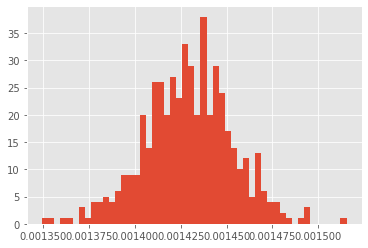

In [10]:
plt.hist(avgavgcov,bins=50)

In [20]:
avgavgcov = []
runprice = df_list[df_list['run'] == 3]['price']
tau = 20 
runreturns = 100*runprice.pct_change()
avgcov = [np.average(abs(runreturns).rolling(i).cov()[i:]) for i in range(6000)][2:]
avgavgcov.append(np.average(avgcov))

C:\Users\marco\AppData\Local\Temp\ipykernel_10664\802031360.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  avgcov = [np.average(abs(runreturns).rolling(i).cov()[i:]) for i in range(6000)][2:]


In [7]:
pvalues = [adfuller(list(df_list[i].loc[:,'price']))[1] for i in range(len(df_list))]
volclus = [acorr_ljungbox(list(df_list[i].loc[:,'price']), lags = [20], return_df = True) for i in range(len(df_list))]
volclusvalues = [volclus[i]['lb_pvalue'].values[0]  for i in range(len(volclus))]
kurtosisvalues = [kurtosis(pd.DataFrame(df_list[i]['price'].values[1:] - df_list[i]['price'].values[:-1]).rolling(20, step = 2).sum()[10:]) for i in range(len(df_list))]

In [113]:
for i, model_df in enumerate(df_list):
    fig , ax = plt.subplots(3,1, figsize=(20, 16),dpi=300)
    ax[0].set_xlabel(f'Price time series - run {i}')
    ax[1].set_xlabel(f'Technical fraction run {i}')
    ax[2].set_xlabel(f'Opinion Index run {i}')
    ax[0].plot(model_df.price, label=f'Run {i}')
    ax[1].plot(model_df.technical_fraction, label=f'Run {i}')
    ax[2].plot(model_df.opinion_index, label = f'Run {i}')
    # fig.tight_layout(pad=5.0)
    title = ['DF-Test pvalue = ', round(pvalues[i],3), ' \u21FE ','Unit Root:', pvalues[i]>0.05,'\n'
             'VC-Test pvalue = ', round(volclusvalues[i],3), ' \u21FE ','Volatility Clustering:', volclusvalues[i]<0.05,'\n' 
             'Kurtosis value = ', kurtosisvalues[i].round(3),' \u21FE ','Leptokurtic:', kurtosisvalues[i]>0,'\n'    ]
    title = ' '.join(str(e) for e in title)
    fig.suptitle(title,fontsize=22,color='black')
    fig.savefig(f'{RESULT_DIR}/immagini/Price and technical fraction over time run={i}',facecolor='white', transparent=False)
    plt.close(fig)

## Histograms

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
plt.style.use('ggplot')

In [41]:
stats = pd.read_csv("{RESULT_DIR}/run_0/stats.csv")
stats

,run,seed,adfuller,acorr_ljungbox,kurtosis10,kurtosis60,kurtosis600
0,0,654.0,0.102024,0.0,0.015410,-0.126901,0.154008
1,1,114.0,0.380553,0.0,0.114310,-0.156964,-0.282484
2,2,25.0,0.404296,0.0,0.054016,-0.094926,0.704943
3,3,759.0,0.288813,0.0,-0.077658,-0.123481,-0.080342
4,4,281.0,0.057071,0.0,-0.071132,0.043000,2.148558
...,...,...,...,...,...,...,...
495,495,636.0,0.452619,0.0,0.052212,-0.109828,0.525829
496,496,576.0,0.145894,0.0,0.093422,0.275233,0.657484
497,497,102.0,0.308959,0.0,0.067628,0.034650,0.273534
498,498,75.0,0.434912,0.0,0.117799,0.118722,0.274933


In [42]:
df_pvals = stats['adfuller']
vc_pvals = stats['acorr_ljungbox']
kurtosis60 = stats['kurtosis60']

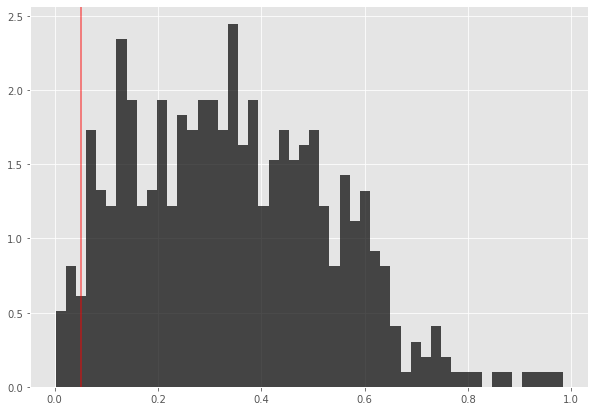

In [40]:
plt.figure(1, figsize=(10,7))
n,bins,patches = plt.hist(df_pvals,50,density=True,facecolor='black',alpha=0.7)
plt.axvline(0.05,color='r',alpha=0.6)

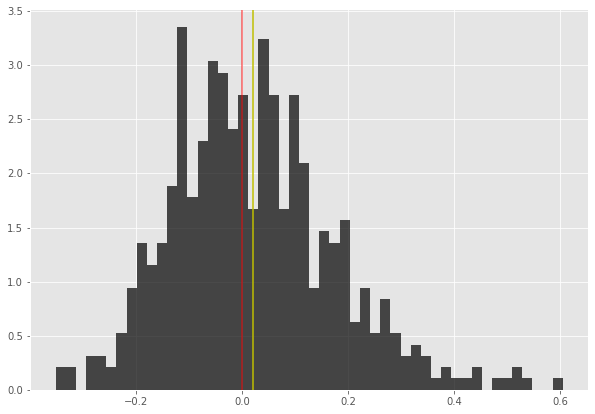

In [46]:
plt.figure(1, figsize=(10,7))
n,bins,patches = plt.hist(kurtosis60,50,density=True,facecolor='black',alpha=0.7)
plt.axvline(0,color='r',alpha=0.6)
plt.axvline(np.average(kurtosis60),color='y')

In [5]:
vcvals = pd.read_csv("avgcovperrun.csv")

In [32]:
vc = vcvals.to_numpy()[:,1]

In [37]:
vc

array([0.0014079 , 0.00143846, 0.0014281 , 0.00145162, 0.00141941,
       0.0013997 , 0.00144284, 0.00143738, 0.00143644, 0.00146128,
       0.00142692, 0.00147542, 0.00141623, 0.00142706, 0.00140361,
       0.00143049, 0.00142634, 0.00145331, 0.00143055, 0.00141025,
       0.00140377, 0.00143087, 0.00144534, 0.00142713, 0.00141149,
       0.00140069, 0.00140481, 0.00142074, 0.00143751, 0.00140872,
       0.00144038, 0.00143572, 0.00143002, 0.00142371, 0.0014435 ,
       0.00142529, 0.00139567, 0.00142789, 0.00137768, 0.00144441,
       0.00143602, 0.00145553, 0.00145607, 0.00141791, 0.00140577,
       0.00141985, 0.00142713, 0.00143027, 0.00144907, 0.00140084,
       0.00141417, 0.001419  , 0.00144059, 0.00141975, 0.00143632,
       0.0014321 , 0.00141628, 0.00141565, 0.00144792, 0.00144269,
       0.00138898, 0.00143617, 0.0014355 , 0.00142819, 0.00143754,
       0.00144859, 0.00143893, 0.001446  , 0.00140964, 0.0014149 ,
       0.00139267, 0.00144286, 0.00146812, 0.00139498, 0.00140

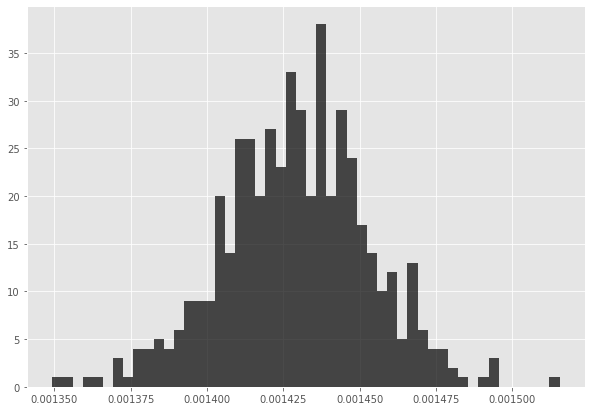

In [40]:
plt.figure(1, figsize=(10,7))
n, bins, patches = plt.hist(vc,50,facecolor='black',alpha=0.7)
# plt.axvline(0.05,color='r',alpha=0.6)
# plt.axvline(np.average(kurtosis60),color='y')